# Preparation work

In [4]:
# General imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Shortcuts to keras if (however from tensorflow)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard 

# Shortcut for displaying images
def plot_img(img):
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.show()
    
# The target image size can be fixed here (quadratic)
# the ImageDataGenerator() automatically scales the images accordingly (aspect ratio is changed)
image_size = 150

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
import os
os.getcwd()
os.chdir(".")

Found 2907 images belonging to 2 classes.


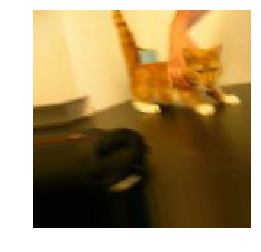

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [4]:
# These are the class names; this defines the ordering of the classes
class_names = ["cat", "dog"]


# Class ImageDataGenerator() returns an iterator holding one batch of images
# the constructor takes arguments defining the different image transformations
# for augmentation purposes (rotation, x-/y-shift, intensity scaling - here 1./255 
# to scale range to [0, 1], shear, zoom, flip, ... )
train_datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


dir_iter = train_datagen.flow_from_directory('./training_data/', 
                                         target_size=(image_size, image_size),
                                         classes=class_names,
                                         batch_size=20, class_mode='sparse', shuffle=False)

plot_img(dir_iter[0][0][0,...])
dir_iter[0][1]

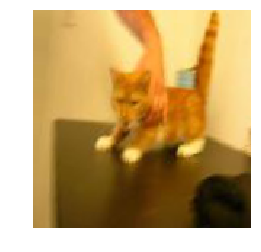

In [5]:
plot_img(dir_iter[0][0][0,...])

# Test different ConvNet Model

In [6]:
tf.keras.backend.clear_session()

# Model 1

In [7]:
batch_size = 20
num_train_images = 2907
num_valid_images = 985
num_classes = 2

model_1= Sequential()
model_1.add(Conv2D(32, (3, 3), input_shape=(image_size, image_size, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(32, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

# this converts our 3D feature maps to 1D feature vectors
model_1.add(Flatten())  
model_1.add(Dense(64))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [10]:
# This is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# This is the augmentation configuration we will use for validation:
# only rescaling
validation_datagen = ImageDataGenerator(rescale=1./255)

# This is a generator that will read pictures found in
# subfolers of './train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        './training_data',  # this is the target directory
        target_size=(image_size, image_size),  # all images will be resized to 150x150
        classes=class_names,
        batch_size=batch_size)  

# This is a similar generator, for validation data
validation_generator = validation_datagen.flow_from_directory(
        './validation_data',
        target_size = (image_size, image_size),
        classes = class_names,
        batch_size = batch_size)

Found 2907 images belonging to 2 classes.
Found 985 images belonging to 2 classes.


In [11]:
name = 'animals'

tensorboard = TensorBoard(
        log_dir ='./tensorboard/' + name + '/', 
        write_graph=True,
        histogram_freq=0,
        profile_batch = 100000000)

# Validate model 1

In [13]:
history = model_1.fit_generator(
          train_generator,
          steps_per_epoch = num_train_images // batch_size,
          epochs = 20,
          validation_data = validation_generator,
          validation_steps = num_valid_images // batch_size,
          callbacks = [tensorboard])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 145 steps, validate for 49 steps
Epoch 1/20
 11/145 [=>............................] - ETA: 38s - loss: 0.5951 - accuracy: 0.6850

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [ ]:
# Choose the class label you want to check
clbl = 7
step = num_valid_images // num_classes
pred_labels = np.argmax(prediction[clbl*step:(clbl+1)*step],axis=1)
wrong_labels = np.transpose(np.nonzero(pred_labels != clbl))

print('wrong classification for: {}'.format(class_names[clbl]))
for i0 in wrong_labels:
    img = validation_generator_no_shuffle[0][0][clbl*step + i0,...]
    plot_img(img.reshape(150,150,3))
    print('matched to: {}'.format(class_names[pred_labels[i0][0]]))